In [ ]:
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt

# Đọc dữ liệu từ Excel
df = pd.read_excel(r"steamdb_data.xlsx")

In [26]:
# Kết nối MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["steamdb"]
collection = db["games"]

# Xóa dữ liệu cũ (nếu có)
collection.delete_many({})
collection.insert_many(df.to_dict("records"))


InsertManyResult([ObjectId('695142b22cd91e369bef6862'), ObjectId('695142b22cd91e369bef6863'), ObjectId('695142b22cd91e369bef6864'), ObjectId('695142b22cd91e369bef6865'), ObjectId('695142b22cd91e369bef6866'), ObjectId('695142b22cd91e369bef6867'), ObjectId('695142b22cd91e369bef6868'), ObjectId('695142b22cd91e369bef6869'), ObjectId('695142b22cd91e369bef686a'), ObjectId('695142b22cd91e369bef686b'), ObjectId('695142b22cd91e369bef686c'), ObjectId('695142b22cd91e369bef686d'), ObjectId('695142b22cd91e369bef686e'), ObjectId('695142b22cd91e369bef686f'), ObjectId('695142b22cd91e369bef6870'), ObjectId('695142b22cd91e369bef6871'), ObjectId('695142b22cd91e369bef6872'), ObjectId('695142b22cd91e369bef6873'), ObjectId('695142b22cd91e369bef6874'), ObjectId('695142b22cd91e369bef6875'), ObjectId('695142b22cd91e369bef6876'), ObjectId('695142b22cd91e369bef6877'), ObjectId('695142b22cd91e369bef6878'), ObjectId('695142b22cd91e369bef6879'), ObjectId('695142b22cd91e369bef687a'), ObjectId('695142b22cd91e369bef68

Số game: 3250
Số cột: 14


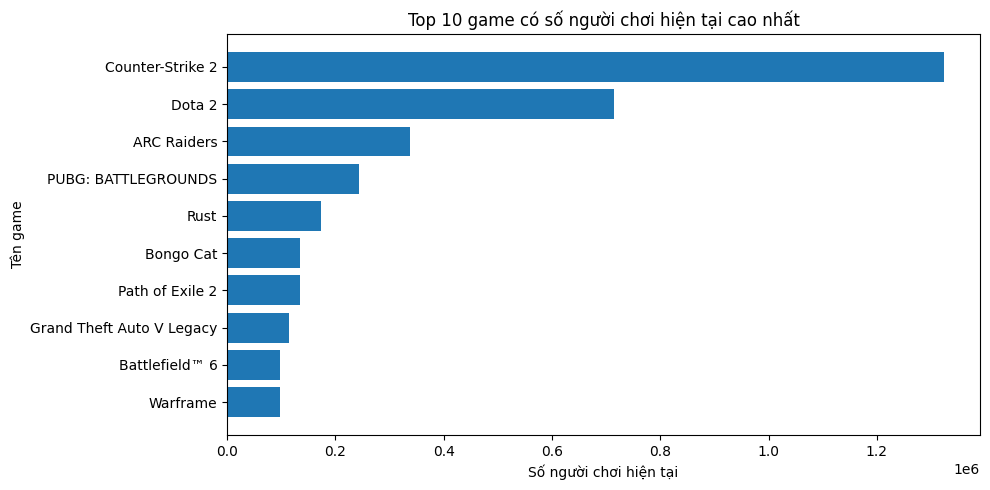

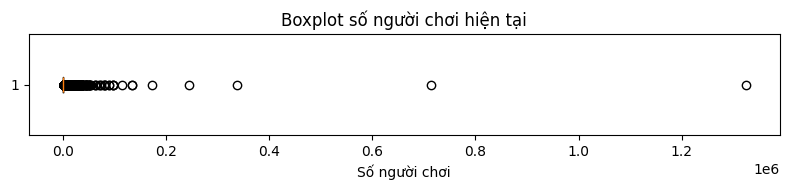

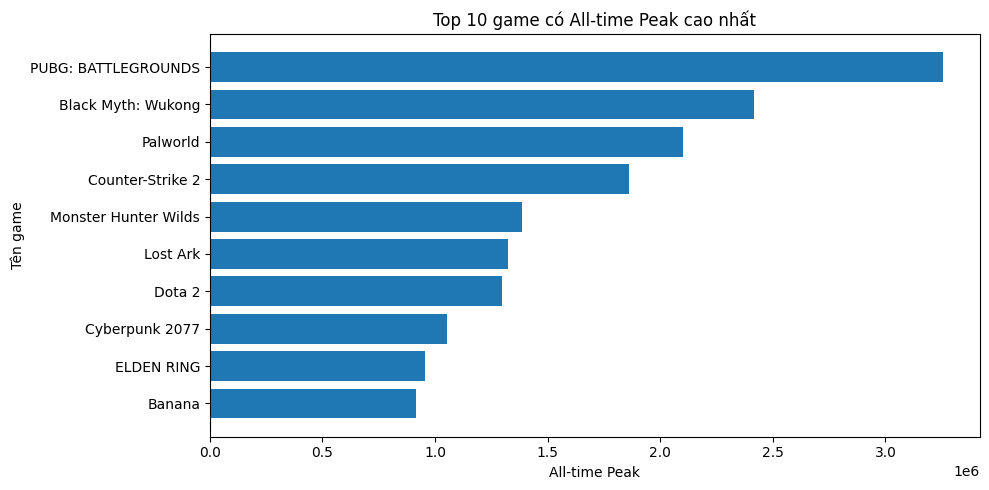

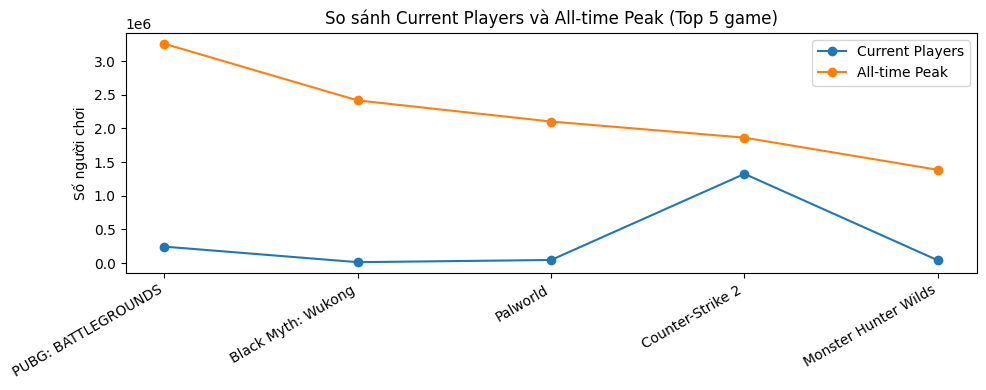

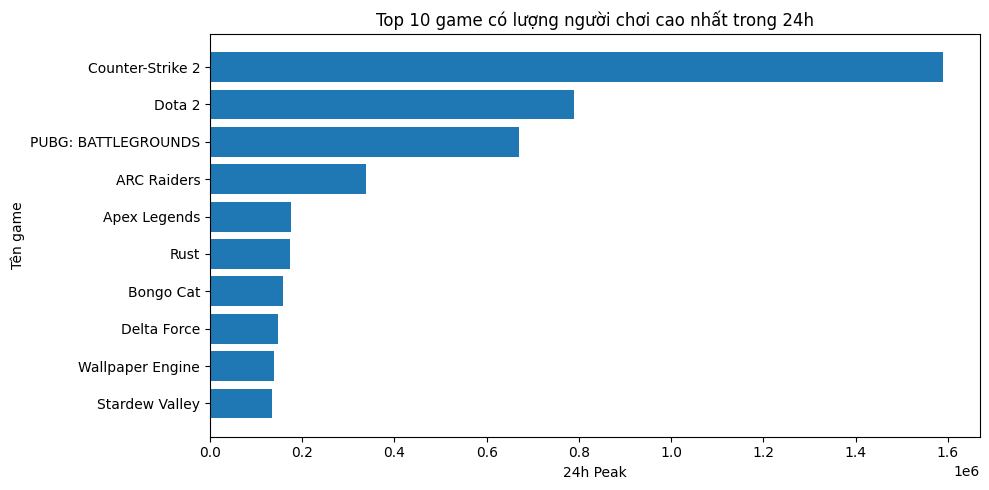

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DejaVu Sans"

# ===== LOAD DATA =====
data = list(collection.find({}, {"_id": 0}))
df = pd.DataFrame(data)

# ===== CHUẨN HÓA CỘT =====
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df = df.rename(columns={"all-time_peak": "all_time_peak"})

# ===== ÉP KIỂU SỐ =====
for col in ["current_players", "24h_peak", "all_time_peak"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(",", "").astype(int)

print("Số game:", df.shape[0])
print("Số cột:", df.shape[1])

# ======================================================
# BIỂU ĐỒ 1: TOP 10 GAME ĐÔNG NGƯỜI CHƠI NHẤT
# ======================================================
df_top10 = df.sort_values("current_players", ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.barh(df_top10["tên_game"], df_top10["current_players"])
plt.title("Top 10 game có số người chơi hiện tại cao nhất")
plt.xlabel("Số người chơi hiện tại")
plt.ylabel("Tên game")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ======================================================
# BIỂU ĐỒ 2: BOXPLOT – PHÁT HIỆN GAME OUTLIER
# ======================================================
plt.figure(figsize=(8, 2))
plt.boxplot(df["current_players"], vert=False)
plt.title("Boxplot số người chơi hiện tại")
plt.xlabel("Số người chơi")
plt.tight_layout()
plt.show()

# ======================================================
# BIỂU ĐỒ 3: TOP 10 GAME THEO ALL-TIME PEAK
# ======================================================
df_peak10 = df.sort_values("all_time_peak", ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.barh(df_peak10["tên_game"], df_peak10["all_time_peak"])
plt.title("Top 10 game có All-time Peak cao nhất")
plt.xlabel("All-time Peak")
plt.ylabel("Tên game")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ======================================================
# BIỂU ĐỒ 4: SO SÁNH CURRENT vs ALL-TIME (TOP 5)
# ======================================================
df_top5 = df.sort_values("all_time_peak", ascending=False).head(5)

plt.figure(figsize=(10, 4))
plt.plot(df_top5["tên_game"], df_top5["current_players"], marker="o", label="Current Players")
plt.plot(df_top5["tên_game"], df_top5["all_time_peak"], marker="o", label="All-time Peak")
plt.title("So sánh Current Players và All-time Peak (Top 5 game)")
plt.ylabel("Số người chơi")
plt.xticks(rotation=30, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# ======================================================
# BIỂU ĐỒ 5: TOP 10 GAME CÓ 24H PEAK CAO NHẤT
# ======================================================
df_24h = df.sort_values("24h_peak", ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.barh(df_24h["tên_game"], df_24h["24h_peak"])
plt.title("Top 10 game có lượng người chơi cao nhất trong 24h")
plt.xlabel("24h Peak")
plt.ylabel("Tên game")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
